# LINMA2171 - Numerical Analysis: Approximation, Interpolation, Integration
## Homework 3

---

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Simulation

In [ ]:
def g(x, beta):
    return beta * x[0]**2 + x[1]**2 - 1

def jacobian_g(x, beta):
    B = np.array([[beta, 0], [0, 1]])
    return 2 * x.T @ B

# System of the form :
# C(x, lambda, t) x' = D

def C(x_t, lam_t, beta):
    C = np.zeros((3, 3), dtype=complex)
    C[0, 0] = 2  * lam_t * beta - 1
    C[0, 1] = 0
    C[0, 2] = 2 * beta * x_t[0]
    C[1, 0] = 0
    C[1, 1] = 2 * lam_t - 1
    C[1, 2] = 2 * x_t[1]
    C[2, 0] = 2 * beta * x_t[0]
    C[2, 1] = 2 * x_t[1]
    C[2, 2] = 0
    return C

def D(lam_0):
    D = np.zeros((3, 1), dtype=complex)
    D[0, 0] = -1
    D[1, 0] = -2 * lam_0
    D[2, 0] = 0
    return D

def simulate(beta, lam0, t0, tf, dt):
    N = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, N)
    x = np.zeros((2, N), dtype=complex)
    lam = np.zeros(N, dtype=complex)

    # Initial conditions
    x[:, 0] = np.array([0.0, 1.0])
    lam[0] = lam0

    for i in range(1, N):
        C_mat = C(x[:, i-1], lam[i-1], beta)
        D_vec = D(lam0)
        sol = np.linalg.solve(C_mat, D_vec)
        x[0, i] = x[0, i-1] + sol[0, 0] * dt
        x[1, i] = x[1, i-1] + sol[1, 0] * dt
        lam[i] = lam[i-1] + sol[2, 0] * dt

    return t, x, lam

t, x, lam = simulate(beta=1.0, lam0=1 + 1j, t0=0.0, tf=1.0, dt=0.0001)
 

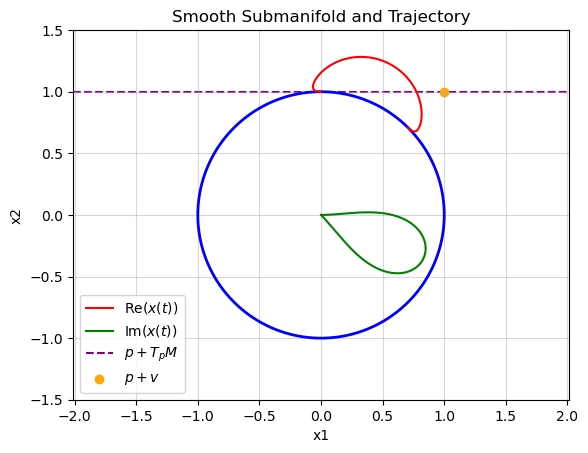

Final point: [0.70718432+5.70678126e-05j 0.70703029-6.91993743e-05j]


In [79]:
RANGE_X = 1.5
RANGE_Y = 1.5


def plot_q1(x):
    domain = np.meshgrid(np.linspace(-RANGE_X, RANGE_X, 1000),
                         np.linspace(-RANGE_Y, RANGE_Y, 1000))
    X, Y = domain

    # Plot smooth submanifold
    Z = g(np.array([X, Y]), beta=1.0)
    plt.contour(X, Y, Z, levels=[0], colors='blue', linewidths=2)
   


    # Plot real and imaginary parts of the trajectory
    plt.plot(x[0, :].real, x[1, :].real, 'r-', label=r'$\mathrm{Re}(x(t))$')
    plt.plot(x[0, :].imag, x[1, :].imag, 'g-', label=r'$\mathrm{Im}(x(t))$')


    # Plot p + TpM
    ## Vectors with second component 0 are in TpM at p = (0, 1)
    ## Thus, p + TpM is the horizontal line y = 1
    plt.axhline(y=1, color='purple', linestyle='--', label=r'$p + T_pM$', zorder=-1)  


    # Plot p + v
    v = np.array([1, 0.0])
    p = np.array([0, 1])
    plt.scatter(p[0] + v[0], p[1] + v[1], color='orange', label=r'$p + v$')  

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Smooth Submanifold and Trajectory')
    plt.axis('equal')
    plt.grid(alpha=0.5)    
    plt.legend()
    plt.savefig('figures/q1_plot.svg', format='svg')
    plt.show()


plot_q1(x)
print("Final point:", x[:, -1])


### 2. Norm of H as a function of $t$ for different $\Delta t$

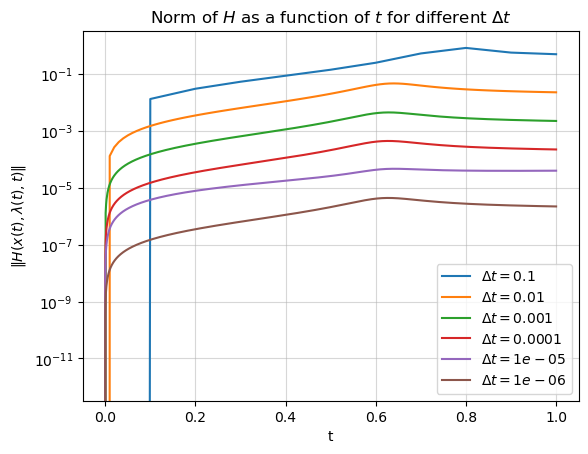

In [99]:
lam0 = 1 + 1j
p = np.array([0.0, 1.0])
v = np.array([1.0, 0.0])

def H(x, lam, t, beta):
    H1 = jacobian_g(x, beta).T * lam - (1-t) * jacobian_g(p, beta).T * lam0 + p + t * v - x
    H2 = g(x, beta)
    return np.array([H1[0], H1[1], H2])

dts = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
t = {}
H_norms = {}

for dt in dts:
    t[dt], x, lam = simulate(beta=1.0, lam0=lam0, t0=0.0, tf=1.0, dt=dt)
    H_norms[dt] = np.zeros_like(t[dt], dtype=float)
    for i in range(t[dt].shape[0]):
        H_val = H(x[:, i], lam[i], t[dt][i], beta=1.0)
        H_norms[dt][i] = np.linalg.norm(H_val)

plt.figure()
for dt in dts:
    plt.plot(t[dt], H_norms[dt], label=r'$\Delta t = {}$'.format(dt))
plt.yscale('log')
plt.xlabel('t')
plt.ylabel(r'$\|H(x(t), \lambda(t), t)\|$')
plt.title(r'Norm of $H$ as a function of $t$ for different $\Delta t$')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/q2_H_norms.svg', format='svg')
plt.show()
